<a href="https://colab.research.google.com/github/luciaPi/Girls_day/blob/main/fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikácia Fashion-MNIST pomocou Konvolučnej neurónovej siete v Pythone

Knižnica: Tensorflow

![Fashion MNIST](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Fashion-MNIST dataset

*   28x28 čiernobiele obrázky
*   70 000 obrázkov (60 000 tréning, 10 000 test)
*   10 kategórií

<br> **Kategórie**

![Labels](https://drive.google.com/uc?id=1g14-UZkDVOaSkDlDX_ead1cNZ79M25xV)


## Stiahnutie fashion_mnist datasetu

**Dataset**
* x - vstup (obrázok)
* y - výstup (kategória)

In [ ]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Vizualizovanie dát

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("y_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Print the number of training and test datasets
print('Train set:', x_train.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
y_test shape: (10000, 28, 28) y_test shape: (10000,)
Train set: 60000 images
Test set: 10000 images


In [ ]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
print(fashion_mnist_labels[2])

Pullover


In [ ]:
# Image index (number between 0 and 59 999)
img_index = 5
# y_train contains the lables (categories from 0 to 9)
label_index = y_train[img_index]
print('Image index:', img_index, ' Label:', label_index, fashion_mnist_labels[label_index])

Image index: 5  Label: 2 Pullover


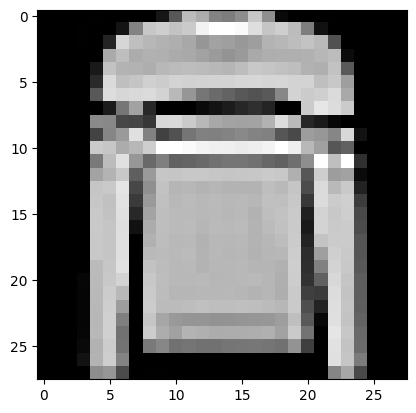

In [ ]:
plt.imshow(x_train[img_index], cmap='gray')

## Normalizácia dát
Dáta musia mať rozsah hodnôt od 0 do 1.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Rozdelenie datasetu

*   Trénovacie dáta - tréning modelu
*   Validačné dáta - tuning parametrov modelu
*   Testovacie dáta - záverečné testovanie modelu



In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('Train set:', x_train.shape[0], 'images')
print('Validation set:', x_valid.shape[0], 'images')
print('Test set:', x_test.shape[0], 'images')

Train set: 55000 images
Validation set: 5000 images
Test set: 10000 images


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


## Vytvorenie modelu

Vrstvy konvolučnej neurónovej siete: 
*   Conv2D - konvolučná vrstva 
*   Pooling - zmenšuje rozmer 
*   Dropout - pridáva náhodnosť 

Vrstvy neurónovej siete: 
*   Flatten - z 2D do 1D
*   Dense - klasická vrstva

In [ ]:
model = tf.keras.Sequential()

# Convolutional neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Neural network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Kompilácia modelu



In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

## Tréning modelu

Priebežne sa ukladá model na základe presnosti na validačnej množine. (checkpoint)


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [ ]:
model.fit(x_train, # training data - input(images)
         y_train, # training data - output(categories)
         batch_size=64,
         epochs=10, # training repetitions
         validation_data=(x_valid, y_valid), # validation set - input,output
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.4844 - accuracy: 0.8216
Epoch 1: val_loss improved from inf to 0.35482, saving model to model.weights.best.hdf5
860/860 [==============================] - 6s 6ms/step - loss: 0.4844 - accuracy: 0.8216 - val_loss: 0.3548 - val_accuracy: 0.8716
Epoch 2/10
855/860 [============================>.] - ETA: 0s - loss: 0.4739 - accuracy: 0.8279
Epoch 2: val_loss improved from 0.35482 to 0.33572, saving model to model.weights.best.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.4745 - accuracy: 0.8279 - val_loss: 0.3357 - val_accuracy: 0.8768
Epoch 3/10
853/860 [============================>.] - ETA: 0s - loss: 0.4733 - accuracy: 0.8272
Epoch 3: val_loss did not improve from 0.33572
860/860 [==============================] - 4s 5ms/step - loss: 0.4730 - accuracy: 0.8272 - val_loss: 0.3424 - val_accuracy: 0.8706
Epoch 4/10
856/860 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.8

## Načítanie modelu s najväčšou validačnou presnosťou

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

Presnosť na testovacích dátach.

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=1)

# Print test accuracy
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2462 - accuracy: 0.9084
Test accuracy: 0.9083999991416931


## Vizualizovanie výsledkov

Použitie natrénovaného modelu.

Predikcia kategórie na testovacom datasete.

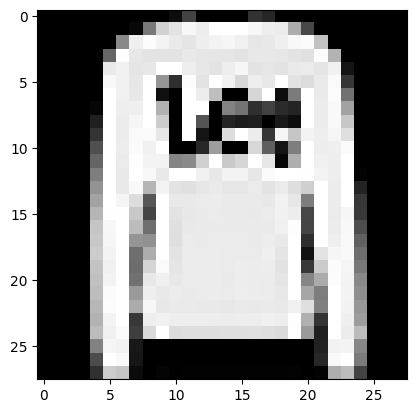

In [ ]:
index = 1
first_img = tf.expand_dims(x_test[index], axis=0)
plt.imshow(first_img[0], cmap='gray')

In [ ]:
prediction = model.predict(first_img)
print('Prediction:', prediction)

1/1 [==============================] - 0s 20ms/step
Prediction: [[1.4958116e-05 2.0072002e-13 9.9995100e-01 1.8446389e-09 2.0122990e-05
  4.4807135e-13 1.3967117e-05 8.9515475e-15 2.3284432e-08 1.4789180e-14]]


In [ ]:
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])
real_index = np.argmax(y_test[index])
print('Real category:', real_index, fashion_mnist_labels[real_index])

Predicted category: 2 Pullover
Real category: 2 Pullover


10 náhodných obrázkov z testovacej množiny.

Predikovaná kategória:
* zelená - správne
* červená - nesprávne

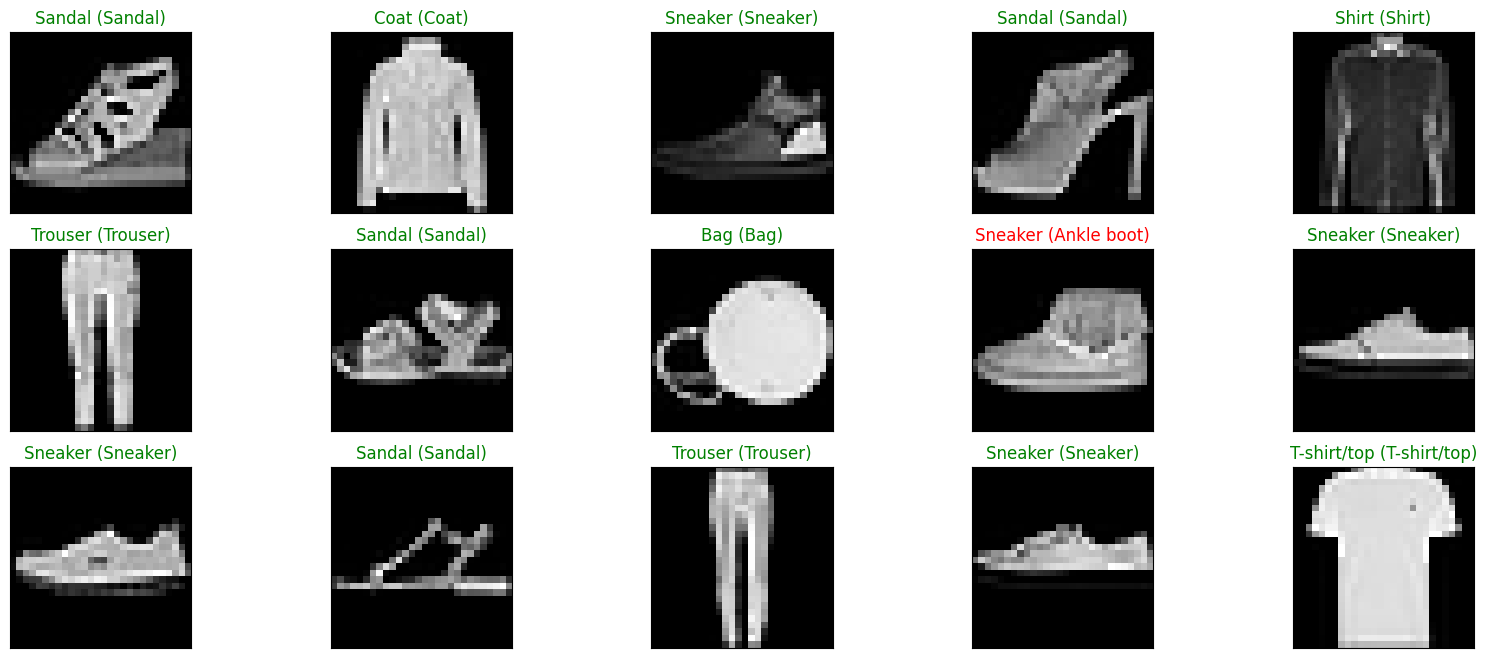

In [ ]:
# 10 random test images
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Experimenty

## Reálny obrázok

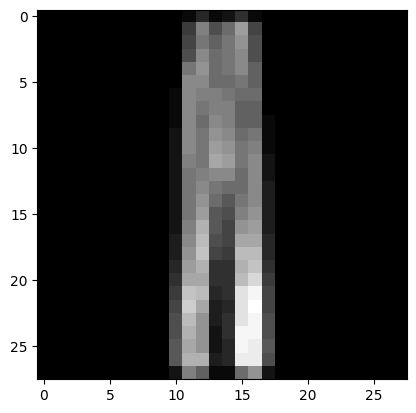

In [ ]:
from PIL import Image

new_img = Image.open('jeans.webp').convert('L')
new_img = np.array(new_img.resize((28, 28)))  # resize image to 28x28
new_img = new_img.astype('float32') / 255
new_img = 1-new_img  # invert colors
new_img = tf.expand_dims(new_img, axis=0)
new_img = tf.expand_dims(new_img, axis=3)
plt.imshow(new_img[0], cmap='gray')

In [ ]:
prediction = model.predict(new_img)
print('Prediction:', prediction)

1/1 [==============================] - 0s 21ms/step
Prediction: [[0.05528001 0.00183308 0.15981433 0.01270843 0.06914336 0.00153327
  0.09139171 0.00138101 0.6034792  0.00343558]]


In [ ]:
predict_index = np.argmax(prediction)
print('Predicted category:', predict_index, fashion_mnist_labels[predict_index])

Predicted category: 8 Bag
